<a href="https://colab.research.google.com/github/geo4548/langchain-geo/blob/master/Part_4_Code_Interpreter_using_OpenAI_Assistants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 4 - Demonstration of Code Interpreter using OpenAI Assistants
This demonstrates how to utilize the new OpenAI [Assistants](https://platform.openai.com/docs/assistants/overview) capabilitiess announced at the [OpenAI Devdays conference](https://devday.openai.com/) on November 6th, 2023.


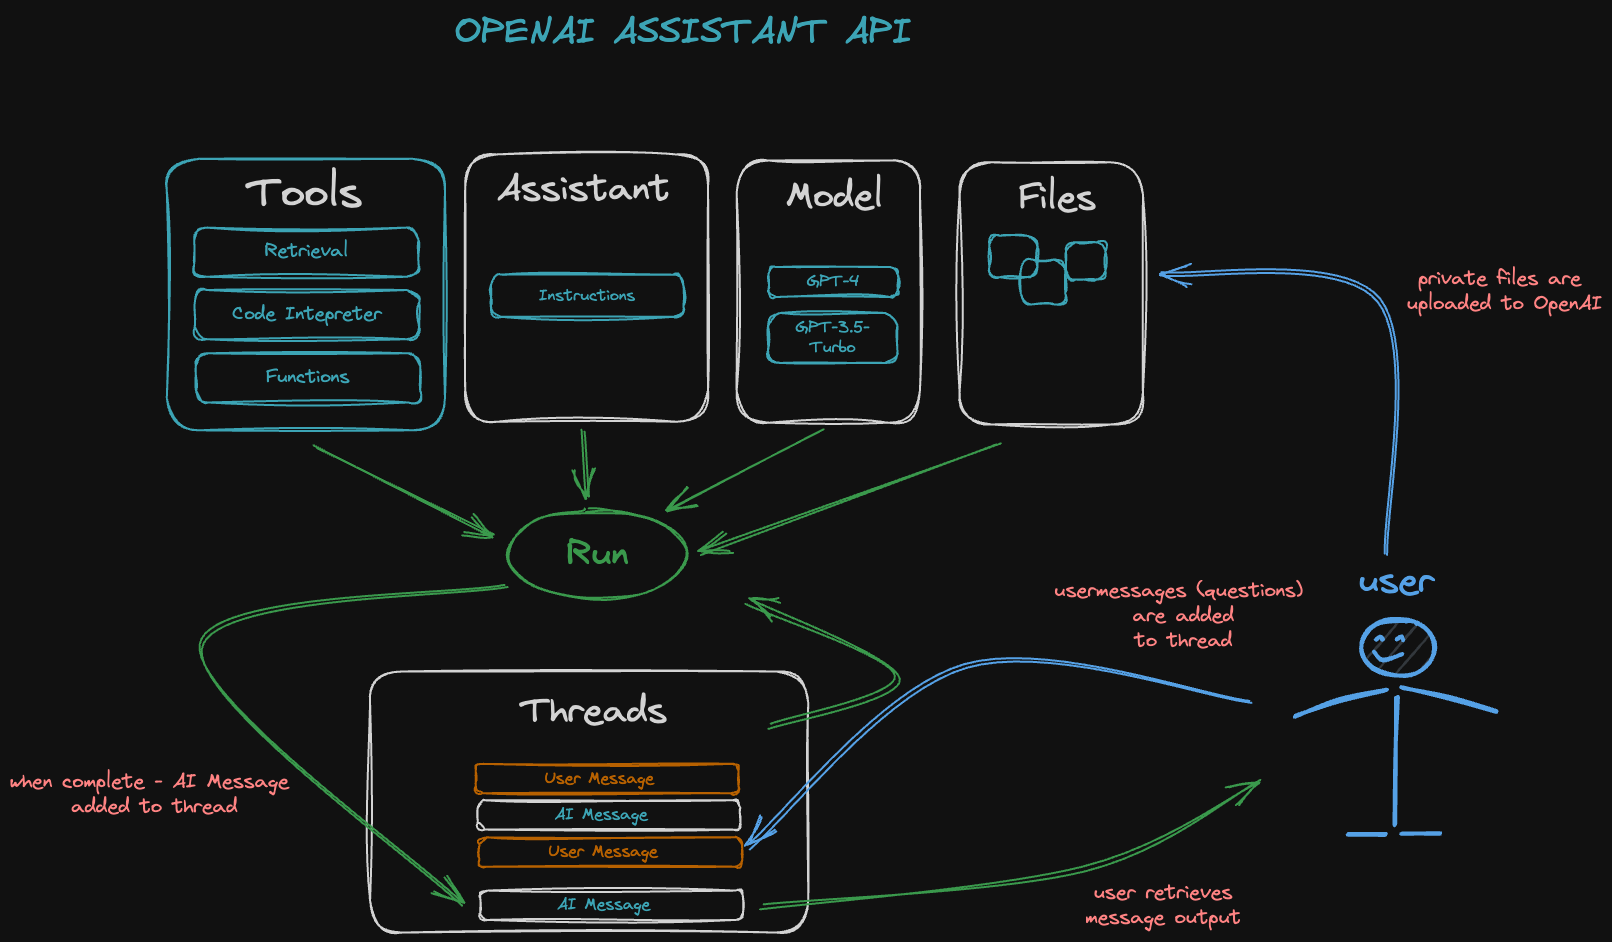

## SETUP

In [ ]:
!pip install cohere tiktoken openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
from pprint import pprint
import json
import time
from openai import OpenAI
import yfinance as yf

### OpenAI API Keys

[OpenAI Keys](https://platform.openai.com/api-keys)
[OpenAI Platform](https://platform.openai.com/apps)

In [ ]:
openai_key="sk-"
org_ID="org-"

### Create the OpenAI Client

In [ ]:
client=OpenAI(
    organization=org_ID,
    api_key=openai_key
)

## Create some stock data to upload

In [ ]:
data = yf.Ticker('MSFT').history(period='1y')
data.to_csv('msft_stock_data.csv')

## Step 1 - Upload Stock files to OpenAI

Upload Limits:


*   File Size: 512MB
*   Max Storage: 100GB



In [ ]:
#Run this ones to upload a file
file = client.files.create(
    file=open("/content/msft_stock_data.csv", "rb"),
    purpose='assistants'
)



In [ ]:
#Call this to get the list of all uploaded files
file_list = client.files.list()
print(file_list)

SyncPage[FileObject](data=[FileObject(id='file-IEnDD5VHEcjVTERl1yj7m5Xn', bytes=29260, created_at=1700923881, filename='msft_stock_data.csv', object='file', purpose='assistants', status='processed', status_details=None)], object='list', has_more=False)


[Your OpenAI files](https://platform.openai.com/files)

In [ ]:
#Grab the ID of the TV Manual uploaded earlier
file_id = file_list.data[0].id
print(file_id)

file-IEnDD5VHEcjVTERl1yj7m5Xn


## Step 2 - Create the assistant and grant access to the files

In [ ]:
#call this once to create the assistant
assistant = client.beta.assistants.create (
    name = "Stock Chart Maker",
    instructions="""
    The Stock Chart Maker is specialized in generating graphs from CSV files containing stock price history.
    It helps users upload their data, analyzes it, and creates accurate charts. While focusing on data accuracy and clear instructions,
    it also explains the generated graphs. The GPT will not provide financial advice and will prioritize user data accuracy.
    If a request is unclear or data is incomplete, it will ask for more information. The communication style is conversational,
    making it user-friendly and approachable for a wide range of users.  Normally the mpl_finance module would be used; however,
    it is not available.  Create a custom candlestick chart using basic matplotlib functionalities only.
    """,
    model = "gpt-4-1106-preview",
    tools = [{'type': 'code_interpreter'}],
    file_ids=[file_id]
)

print(assistant)

Assistant(id='asst_9hTT36NcMDqd5tYwypE4DVmJ', created_at=1700924057, description=None, file_ids=['file-IEnDD5VHEcjVTERl1yj7m5Xn'], instructions='\n    The Stock Chart Maker is specialized in generating graphs from CSV files containing stock price history.\n    It helps users upload their data, analyzes it, and creates accurate charts. While focusing on data accuracy and clear instructions,\n    it also explains the generated graphs. The GPT will not provide financial advice and will prioritize user data accuracy.\n    If a request is unclear or data is incomplete, it will ask for more information. The communication style is conversational,\n    making it user-friendly and approachable for a wide range of users.  Normally the mpl_finance module would be used; however,\n    it is not available.  Create a custom candlestick chart using basic matplotlib functionalities only.\n    ', metadata={}, model='gpt-4-1106-preview', name='Stock Chart Maker', object='assistant', tools=[ToolCodeInterp

[Your Assistants Can be found here on the OpenAI Website](https://platform.openai.com/assistants)

In [ ]:
#call this anytime you want to update an existing assistant
assistant = client.beta.assistants.update (
    "asst_YnS04OiUFQVyKcZO803xrHhn",
    name = "Stock Chart Maker",
    instructions="""
    The Stock Chart Maker is specialized in generating graphs from CSV files containing stock price history.
    It helps users upload their data, analyzes it, and creates accurate charts. While focusing on data accuracy and clear instructions,
    it also explains the generated graphs. The GPT will not provide financial advice and will prioritize user data accuracy.
    If a request is unclear or data is incomplete, it will ask for more information. The communication style is conversational,
    making it user-friendly and approachable for a wide range of users.  Normally the mpl_finance module would be used; however,
    it is not available.  Create a custom candlestick chart using basic matplotlib functionalities only.
    """,
    model = "gpt-3.5-turbo-1106",
    tools = [{'type': 'code_interpreter'}],
    file_ids=[file_id]
)

print(assistant)

Assistant(id='asst_JjruaBK19uVWwDmZgGwVNUvO', created_at=1700151865, description=None, file_ids=['file-2Y9LrUAHiKzQnC55ZwOc2koN'], instructions='You are a chatbot designed to respond to inquires about the Vizio V Series Televisions, Models: V435M-K04, V505M-K09, V555M-K01, V585M-K01, V655M-K03, V655M-K04, V705M-K03 & V755M-K03', metadata={}, model='gpt-4-1106-preview', name='Vizio TV Chatbot', object='assistant', tools=[ToolRetrieval(type='retrieval')])


In [ ]:
#to retrieve all your defined assistants
my_assistants = client.beta.assistants.list(
    order="desc",
    limit = "20"
)

pprint(my_assistants.data)

[Assistant(id='asst_9hTT36NcMDqd5tYwypE4DVmJ', created_at=1700924057, description=None, file_ids=['file-IEnDD5VHEcjVTERl1yj7m5Xn'], instructions='\n    The Stock Chart Maker is specialized in generating graphs from CSV files containing stock price history.\n    It helps users upload their data, analyzes it, and creates accurate charts. While focusing on data accuracy and clear instructions,\n    it also explains the generated graphs. The GPT will not provide financial advice and will prioritize user data accuracy.\n    If a request is unclear or data is incomplete, it will ask for more information. The communication style is conversational,\n    making it user-friendly and approachable for a wide range of users.  Normally the mpl_finance module would be used; however,\n    it is not available.  Create a custom candlestick chart using basic matplotlib functionalities only.\n    ', metadata={}, model='gpt-4-1106-preview', name='Stock Chart Maker', object='assistant', tools=[ToolCodeInter

##Step 3 - Create an empty thread

In [ ]:
thread = client.beta.threads.create()

In [ ]:
print(thread)

Thread(id='thread_cKanvuuPYDJKybIRf6lVzcey', created_at=1700924117, metadata={}, object='thread')


##Step 4 - Add a user message to the thread

In [ ]:
message = client.beta.threads.messages.create(
    thread_id = thread.id,
    role = 'user',
    content='show me the candlestick graph for microsoft.  provide a link to download the image. provide me a link to download the script as well.'
)
print(message)

ThreadMessage(id='msg_ZH7HtrER2fBLtfit9bDSLr5D', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='show me the candlestick graph for microsoft.  provide a link to download the image. provide me a link to download the script as well.'), type='text')], created_at=1700924196, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_cKanvuuPYDJKybIRf6lVzcey')


##Step 5 - Run the assistant to get back a response

In [ ]:
run = client.beta.threads.runs.create(
    thread_id = thread.id,
    assistant_id = assistant.id,

)

print(run.id)

run_mvGmiaY90GfnHOwHoFzgvUhk


##Step 6 - Retrieve the Run Status

In [ ]:
run = client.beta.threads.runs.retrieve(
    thread_id = thread.id,
    run_id = run.id
)

print(run.status)

in_progress


In [ ]:
while run.status not in ["completed", "failed"]:
  run = client.beta.threads.runs.retrieve(
    thread_id = thread.id,
    run_id = run.id
  )

  print(run.status)
  time.sleep(10)

in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
completed


##Step 7 - Retrieve the messages from the thread
You will need to iterate through the messages and pull out any file annotations to either save or display
[threads and messages](https://platform.openai.com/docs/assistants/how-it-works/managing-threads-and-messages)

In [ ]:
messages = client.beta.threads.messages.list(
    thread_id = thread.id,

)
for each in messages:
  print(each)


ThreadMessage(id='msg_uG2jE0yxYWXFvlpsqcsBTaN1', assistant_id='asst_9hTT36NcMDqd5tYwypE4DVmJ', content=[MessageContentText(text=Text(annotations=[TextAnnotationFilePath(end_index=194, file_path=TextAnnotationFilePathFilePath(file_id='file-NN41zCSCZuERa1aDuP1mZAQp'), start_index=149, text='sandbox:/mnt/data/candlestick_chart_script.py', type='file_path')], value='The script used to generate the candlestick chart has been saved. You can download it using the following link:\n\n[Download Candlestick Chart Script](sandbox:/mnt/data/candlestick_chart_script.py)\n\nJust remember to replace `YOUR_CSV_FILE_PATH` with the actual path to your CSV file when you use the script on your own system.'), type='text')], created_at=1700924301, file_ids=['file-NN41zCSCZuERa1aDuP1mZAQp'], metadata={}, object='thread.message', role='assistant', run_id='run_mvGmiaY90GfnHOwHoFzgvUhk', thread_id='thread_cKanvuuPYDJKybIRf6lVzcey')
ThreadMessage(id='msg_4vbu424lwBeaIxiZE7jqBHVd', assistant_id='asst_9hTT36NcMDqd5

In [ ]:
for message in messages:
    print("-" * 50)
    # Print the role of the sender
    print(f"Role: {message.role}")

    # Process each content item in the message
    for content in message.content:
        # Check if the content is text
        if content.type == 'text':
            print(content.text.value)

            # Check and print details about annotations if they exist
            if content.text.annotations:
                for annotation in content.text.annotations:
                    print(f"Annotation Text: {annotation.text}")
                    print(f"File_Id: {annotation.file_path.file_id}")
                    annotation_data = client.files.content(annotation.file_path.file_id)
                    annotation_data_bytes = annotation_data.read()

                    #file_extension = annotation.text.split('.')[-1]
                    filename = annotation.text.split('/')[-1]

                    with open(f"{filename}", "wb") as file:
                        file.write(annotation_data_bytes)

        # Check if the content is an image file and print its file ID and name
        elif content.type == 'image_file':
            print(f"Image File ID: {content.image_file.file_id}")
            # image_data = client.files.content(content.image_file.file_id)
            # image_data_bytes = image_data.read()

            # with open(f"{content.image_file.file_id}.png", "wb") as file:
            #     file.write(image_data_bytes)

    # Print a horizontal line for separation between messages
    print("-" * 50)
    print('\n')


--------------------------------------------------
Role: assistant
The script used to generate the candlestick chart has been saved. You can download it using the following link:

[Download Candlestick Chart Script](sandbox:/mnt/data/candlestick_chart_script.py)

Just remember to replace `YOUR_CSV_FILE_PATH` with the actual path to your CSV file when you use the script on your own system.
Annotation Text: sandbox:/mnt/data/candlestick_chart_script.py
File_Id: file-NN41zCSCZuERa1aDuP1mZAQp
--------------------------------------------------


--------------------------------------------------
Role: assistant
Image File ID: file-s27wfxQpyEHWHOn0jrkWDSS1
The candlestick chart for Microsoft has been generated. You can download the image of the chart using the link below:

[Download Candlestick Chart Image](sandbox:/mnt/data/candlestick_chart.png)

Next, I will provide you with the script that was used to generate this chart, which you can download as well.
Annotation Text: sandbox:/mnt/data

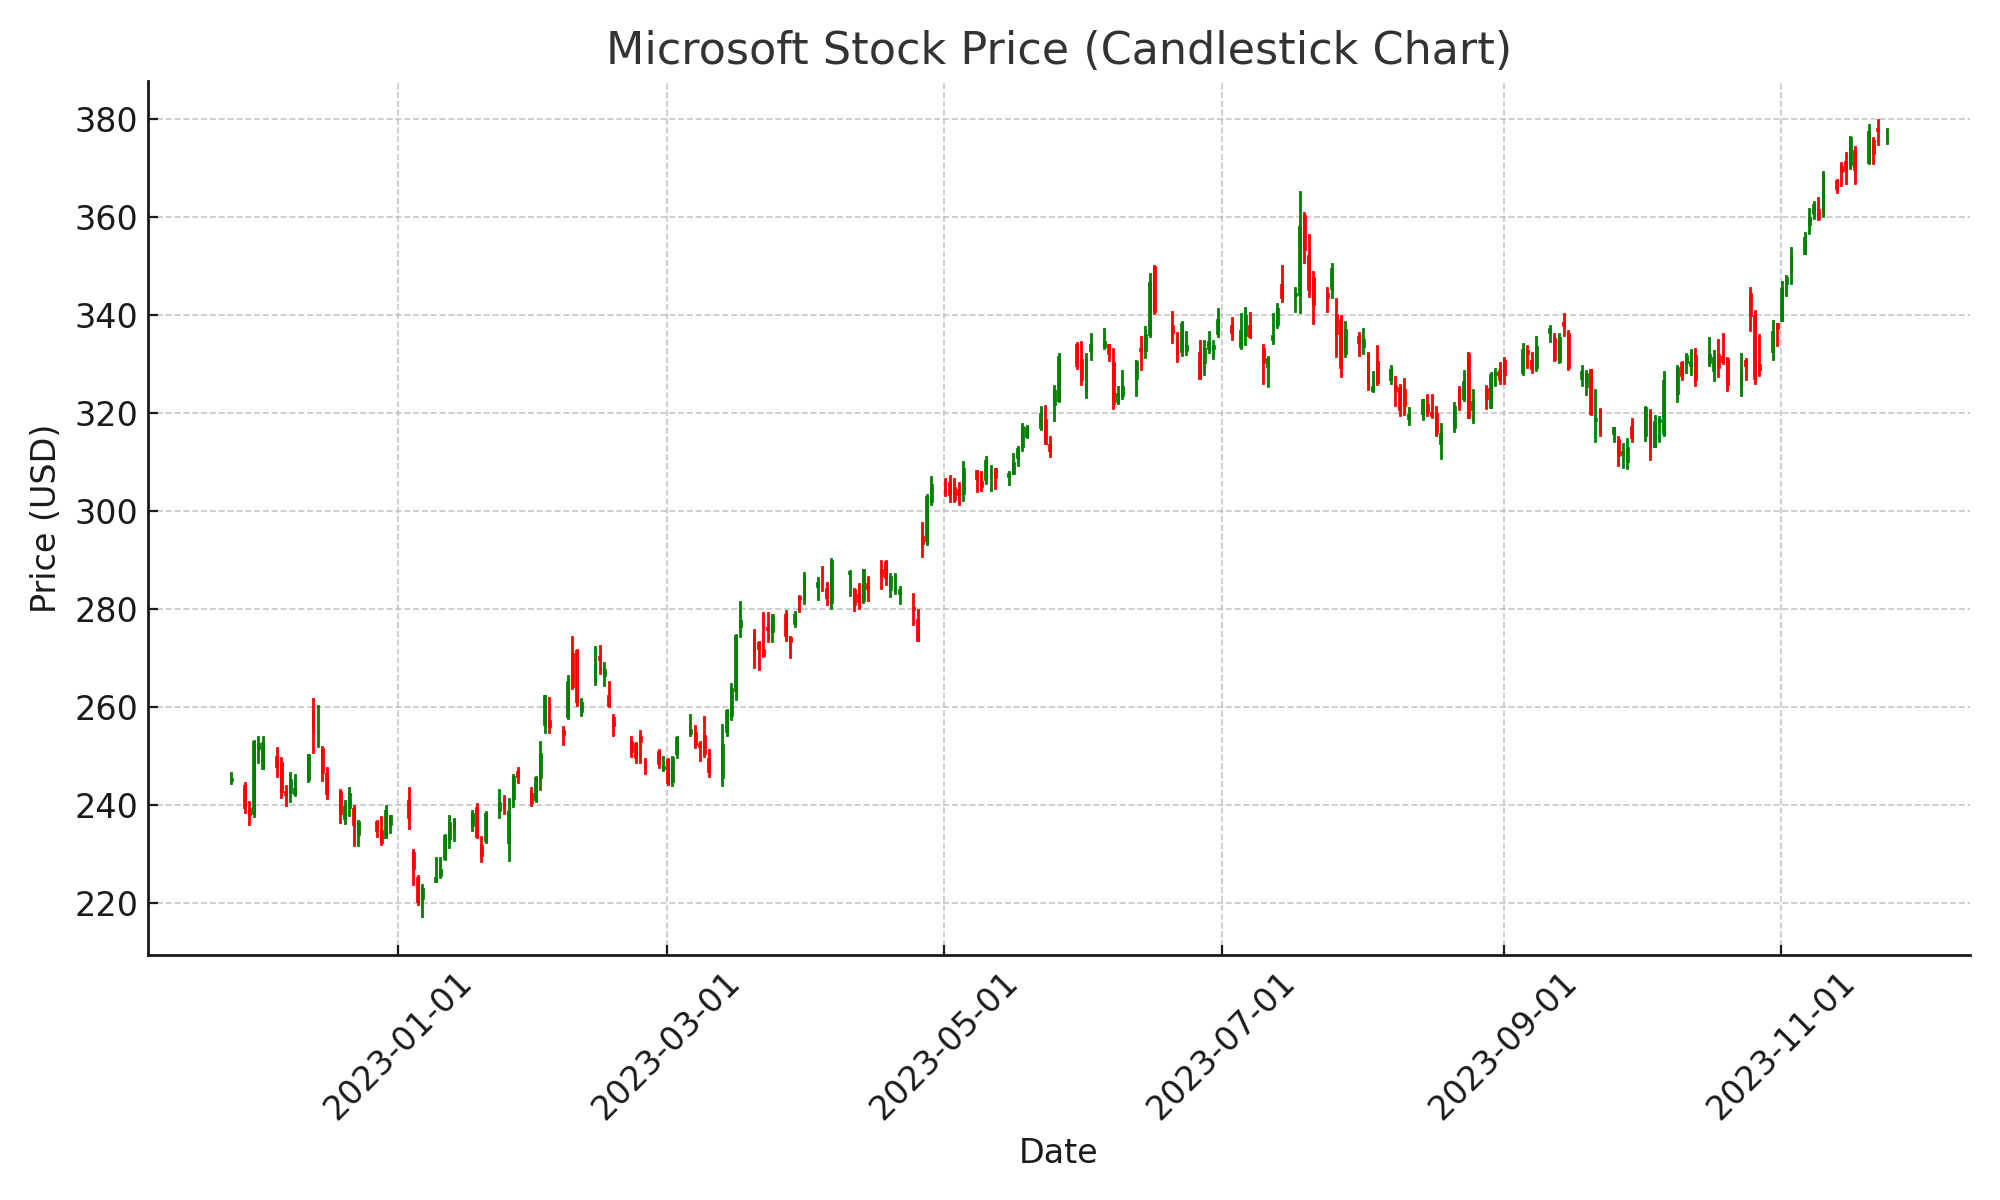

In [ ]:
from PIL import Image
from IPython.display import display
#import io

#image_stream = io.BytesIO(image_data_bytes)

# Load the image from the BytesIO object
img = Image.open("./microsoft_candlestick_chart.png")

# Display the image
display(img)


## POST Demo Cleanup
Delete your assistant and any files that you uploaded


In [ ]:
response = client.beta.assistants.delete(assistant.id)
print(response)

AssistantDeleted(id='asst_9hTT36NcMDqd5tYwypE4DVmJ', deleted=True, object='assistant.deleted')


In [ ]:
response = client.files.delete(file_id)
print(response)

FileDeleted(id='file-IEnDD5VHEcjVTERl1yj7m5Xn', deleted=True, object='file')
